## PHYS280: HW 6
### Kavish Senthilkumar

We use the Gillespie direct algorithm below.

A few important notes.

We use the <code> pops </code> matrix below to store position at any given time. We note we also have to prevent a negative population in C, and so check to ensure Reaction 3 does not occur if population B is nonzero and population C is 0. 

We also have three breakpoints, calculated with each pair of possible reactions. We use these breakpoints to determine the next step of the reaction. 


Graphs for three trials of this algorithm are attached below.


We also make an animation for the time development of all three populations using <code> pops </code>. An animation for one trial is attached. 

Some ideas for code from Noah and Katie. 

<IPython.core.display.Javascript object>


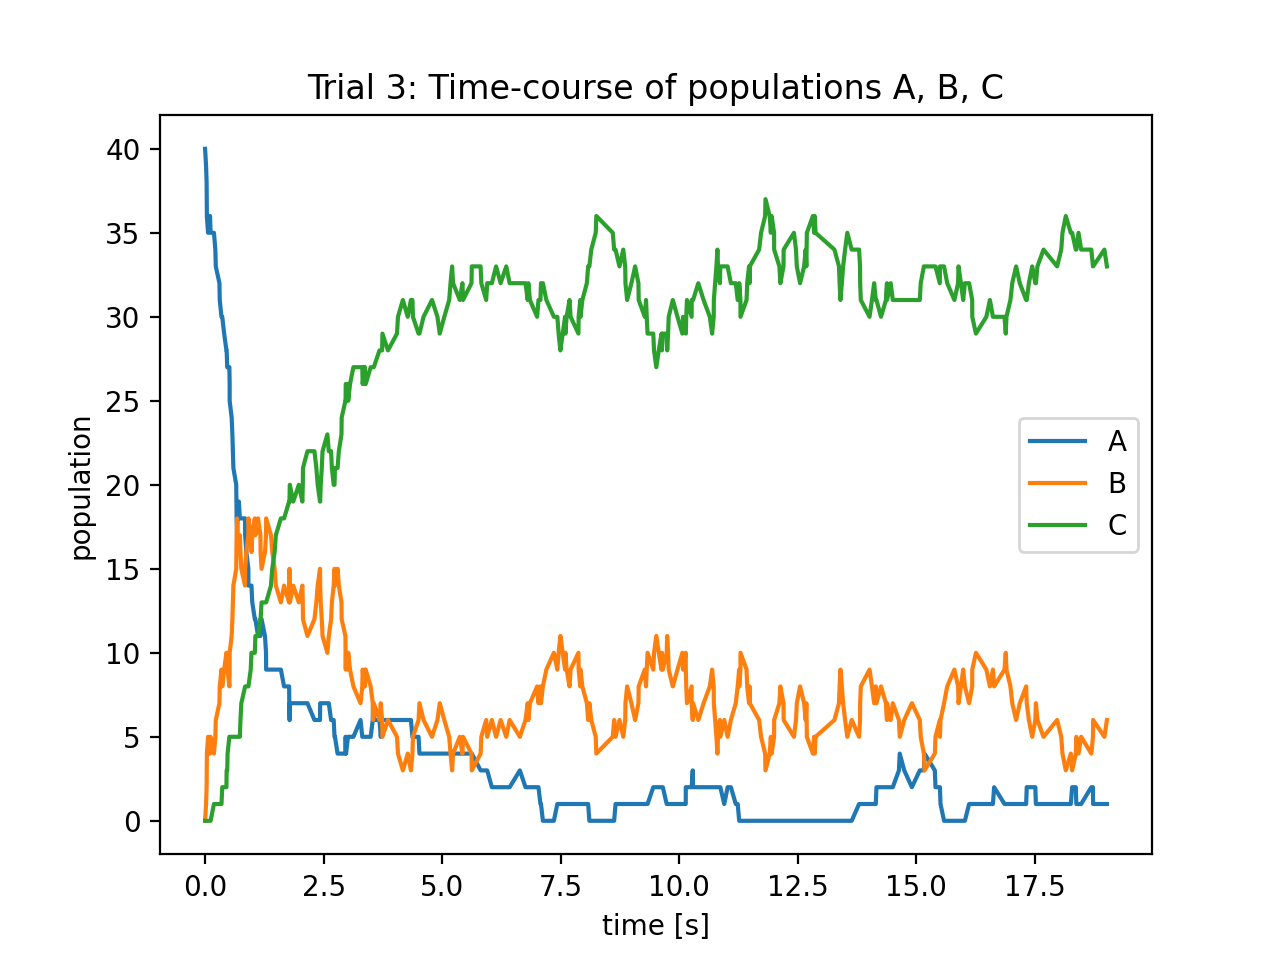

<IPython.core.display.Javascript object>


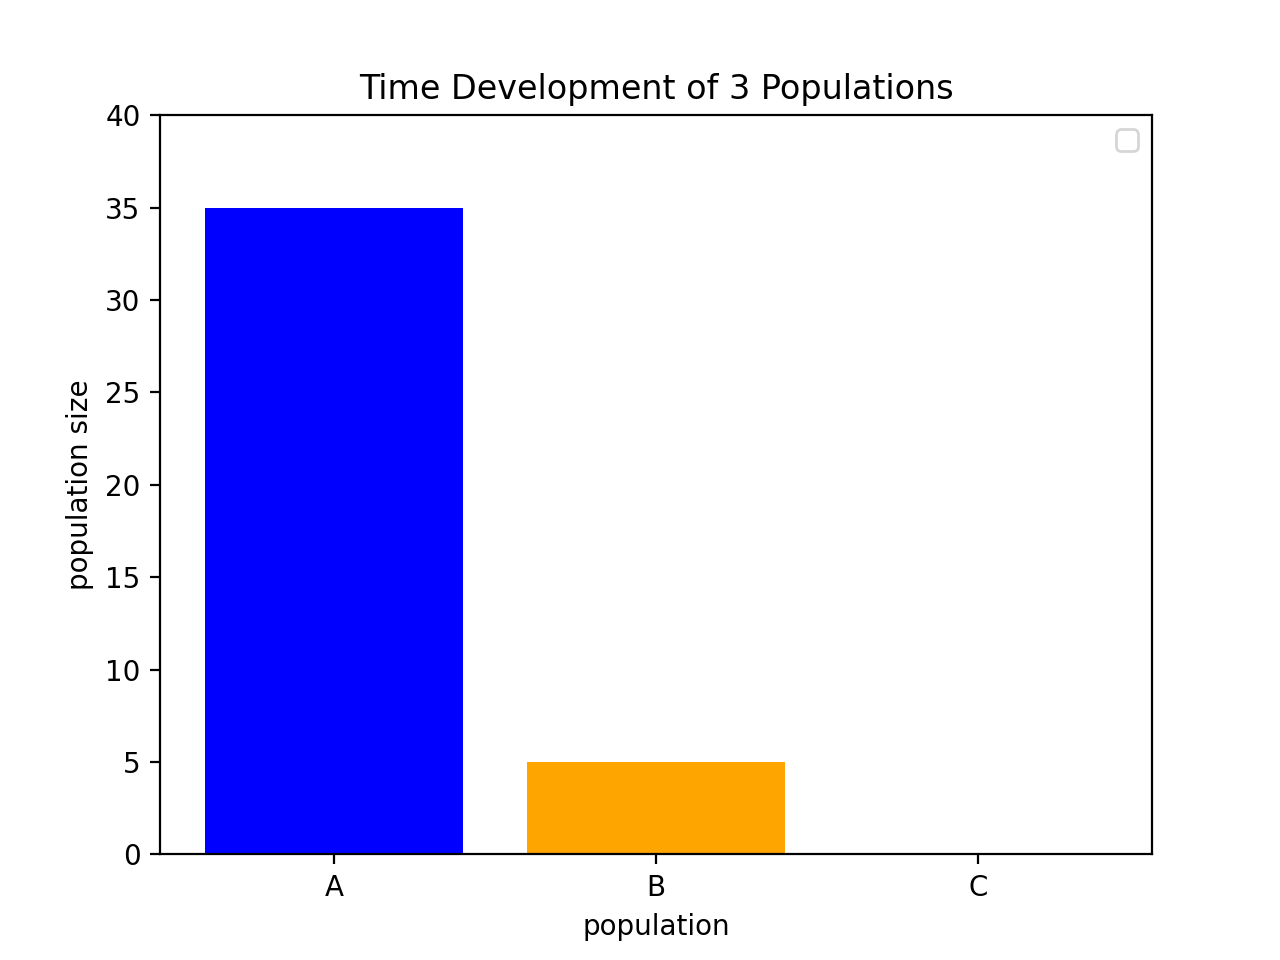

In [65]:
%matplotlib notebook

import numpy as np; import matplotlib.pyplot as plt;
from numpy.random import random as rng
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython import display

""" Three states:
     0 = A; 1 = B; 2 = C
4 reactions: 

0: A-->B :  1
1: B-->A :  0.2
2: B-->C :  1
3: C-->B :  0.2

"""
stoich = [[1,0,0], [0,1,0], [0,1,0], [0,0,1]]
rates = np.array([1,0.2,1,0.2]) # rates in inverse s
rates = rates.reshape(4,1)
Mtot = 40 # total number of molecs is constant
Ntrans = 350 # number of steps to simulate
pops = np.zeros((Ntrans+1, 3)) # allocate for populations in states A, B, C
pops[0] = [40,0,0] # initially all in A
ts = np.zeros(Ntrans+1) # allocate
rxnchooser = rng(Ntrans); timechooser = rng(Ntrans)
for j in range(Ntrans):
    a = rates
    b = (pops[j,:]*stoich)
    propens = (a*b).sum(axis=1) # propensities for each rxn
    norm = propens.sum()
    
    # calculate three breakpoints
    breakpoints = np.cumsum(propens / norm)

    arr = np.array([0, 0, 0])
    curr_p = pops[j]
    
    # Ensure C won't go negative by redrawing if it will
    chosen = rxnchooser[j]
    if (curr_p[1] > 0 and curr_p[2] == 0):
        while (chosen > breakpoints[2]):
            chosen = np.random.random()
           
    #check breakpoints, add proper array
    if (chosen <= breakpoints[0]):
        arr = np.array([-1, +1, 0])
    elif (chosen <= breakpoints[1]): 
        arr = np.array([+1, -1, 0])
    elif (chosen <= breakpoints[2]):
        arr = np.array([0, -1, +1]) 
    else:
        arr = np.array([0, +1, -1]) 

    pops[j+1] = pops[j] + arr
    ts[j+1] = ts[j] - np.log(timechooser[j])/norm
    
    
#plotting
fig = plt.figure(facecolor=(1, 1, 1))   
plt.plot(ts, pops)
plt.legend(('A','B', 'C'))
plt.title("Trial 3: Time-course of populations A, B, C")
plt.xlabel('time [s]'); plt.ylabel('population')
plt.savefig("/Users/kavishs/Desktop/fig3.png")


fig2 = plt.figure()


#animate every row of pops
def get_step(n): 
    plt.clf()
    plt.show()
    plt.title("Time Development of 3 Populations" )
    plt.ylim(0,40)
    plt.legend(('A','B', 'C'))
    plt.bar(["A","B","C"], pops[n], color=["blue", "orange", "green"])
    plt.xlabel('population'); plt.ylabel('population size')



    
    
# Call the animator and create the movie.
my_movie = animation.FuncAnimation(fig2, get_step, frames=350, blit=True)
#plt.show()